<H3>PRI 2022: second
    project delivery</H3>

**GROUP 1**
- Robin Helbig, ist1105007
- Karolina Kowalczyk, ist1105122
- Hubert Budny, ist1105348

<H2>Main facilities</H2>

<h3>Part I: clustering</h3>

*Load documents*

In [2]:
from helper.documentHelper import read_files, intToCategory
from mainFunctions.clustering.clustering import clustering
from mainFunctions.clustering.evaluate import evaluate
from mainFunctions.clustering.interpret import interpret
from mainFunctions.clustering.evaluate import plot_dendrogram
from mainFunctions.clustering.evaluate import pca_plot
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from matplotlib import pyplot as plt

from mainFunctions.relevance.extraction import check_accuracy_documents_bayes_idf_position, \
    check_accuracy_documents_bayes_no_idf_cosine, check_accuracy_documents_bayes_idf_cosine, \
    check_accuracy_documents_bayes_no_idf_position, feature_extraction_tf_idf, map_vectors_to_data_frame, naive_bayes, \
    knn_model, check_accuracy_documents_bayes_no_idf, check_accuracy_documents_knn_idf, \
    check_accuracy_documents_bayes_idf, check_accuracy_documents_knn_no_idf

text_processing = True
documents = read_files(text_processing)

args = {'n_clusters': 7, 'max_df': 0.07, 'criteria': 'mean'}

*A) Clustering*

In [3]:
#code here
cluster_model = clustering(documents, args)
cluster_data = cluster_model.labels_

*B) Visualization*



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.02532

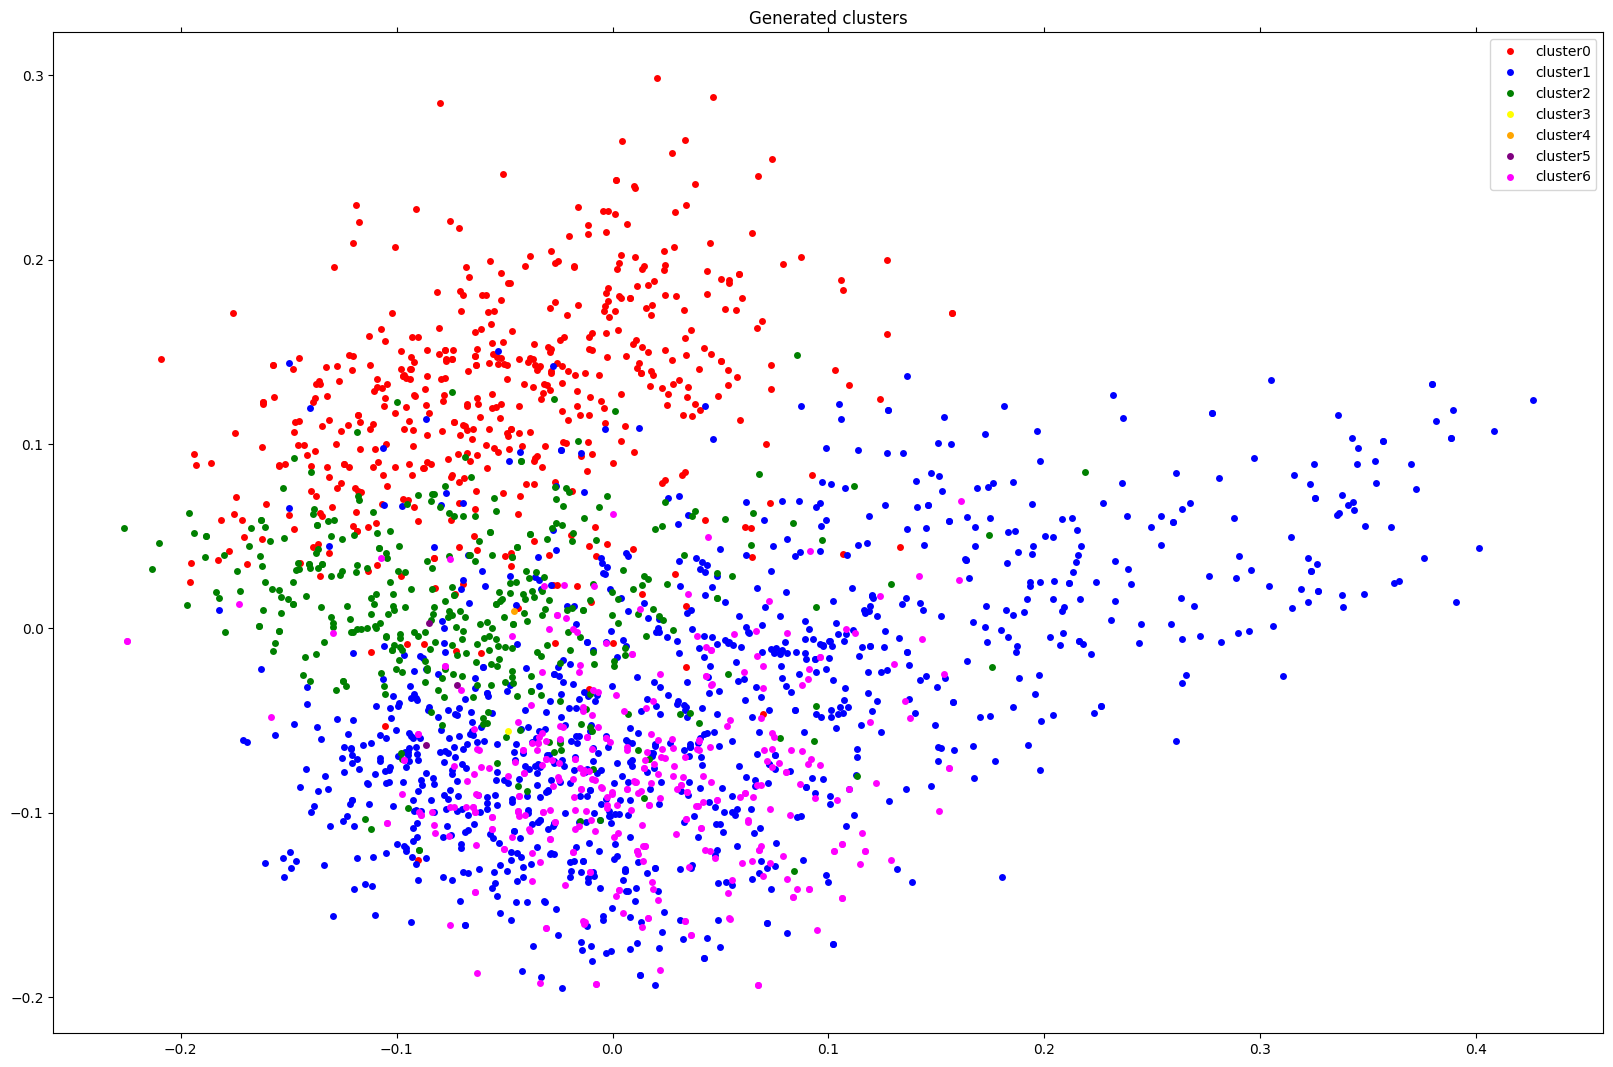

In [3]:
#code and charts here
print("\n\nMost important terms per cluster:")
relevant_term_list = interpret(cluster_data, documents, args)
for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
    print("Cluster: " + str(index))
    for i in range(10):
        term = cluster_relevant_terms[i][0]
        tfidf = cluster_relevant_terms[i][1]
        print("Term: " + term + ", TFIDF: " + str(tfidf))
    print("\n")

pca_plot(cluster_data, documents)

*C) Evaluation*



Evaluation:
Silhouette score: 0.014244019766509094
Ran score:  0.5840523733343097
Purity score: 0.736629213483146

Dendrogram: 


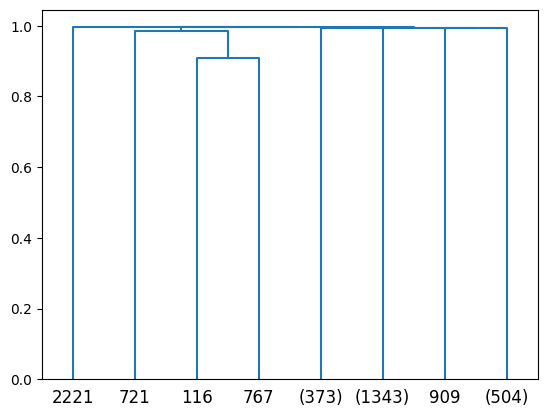

In [4]:
#code, statistics and/or charts here
sil_score, ran_score, pur_score = evaluate(cluster_data, documents)

print("\n\nEvaluation:")
print("Silhouette score: " + str(sil_score))
print("Ran score: ", str(ran_score))
print("Purity score: " + str(pur_score))

print("\nDendrogram: ")
plot_dendrogram(cluster_model, truncate_mode='level', p=3)

<h3>Part II: classification</h3>

*A) Feature extraction*

In [5]:
#code and statistics here
vectors = feature_extraction_tf_idf(documents[0], True)
vectors_no_idf = feature_extraction_tf_idf(documents[0], False)
print(vectors[0].to_string() + "\n" + vectors[1].to_string() + "\n" + vectors[2].to_string())
print(vectors_no_idf[0].to_string() + "\n" + vectors_no_idf[1].to_string()+ "\n" + vectors_no_idf[2].to_string())

Position: 1 Similarity: [[0.66263768]] In summary: True
Position: 2 Similarity: [[0.60578779]] In summary: False
Position: 3 Similarity: [[0.33898756]] In summary: True
Position: 1 Similarity: [[0.66263768]] In summary: True
Position: 2 Similarity: [[0.60578779]] In summary: False
Position: 3 Similarity: [[0.33898756]] In summary: True


*B) Classification*

In [6]:
#code here
(data_bayes_idf, output_bayes_idf) = map_vectors_to_data_frame(vectors)
(data_bayes_no_idf, output_bayes_no_idf) = map_vectors_to_data_frame(vectors_no_idf)
(data_knn_idf, output_knn_idf) = map_vectors_to_data_frame(vectors)
(data_knn_no_idf, output_knn_no_idf) = map_vectors_to_data_frame(vectors_no_idf)

*C) Ranking extension*

In [1]:
#code here
bayes_idf_model, X_train1, X_test1, y_train1, y_test1 = naive_bayes(data_bayes_idf, output_bayes_idf)
bayes_no_idf_model, X_train2, X_test2, y_train2, y_test2 = naive_bayes(data_bayes_no_idf, output_bayes_no_idf)
knn_received_model, X_train3, X_test3, y_train3, y_test3 = knn_model(data_knn_no_idf, output_knn_no_idf)
knn_idf_model, X_train4, X_test4, y_train4, y_test4 = knn_model(data_knn_idf, output_knn_idf)

NameError: name 'naive_bayes' is not defined

*D) Evaluation*

In [8]:
#code, statistics and/or charts here
check_accuracy_documents_bayes_no_idf(documents)
check_accuracy_documents_bayes_idf(documents)
check_accuracy_documents_knn_idf(documents)
check_accuracy_documents_knn_no_idf(documents)

Bayes no idf average: 0.5195273674716885
Bayes idf average: 0.5220599504522421
Knn idf average: 0.5354574787517347
Knn no idf average: 0.532049807893592


<h3>Part III: link analysis</h3>

*A) Graph construction*

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from typing import List


def build_graph(sentences: List[str], threshold: float, use_idf: bool) -> [[float]]:
    matrix = [[0 for i in range(len(sentences))] for j in range(len(sentences))]
    for index_a, sentence_a in enumerate(sentences):
        for index_b, sentence_b in enumerate(sentences):
            tfIdfVectorizer = TfidfVectorizer(use_idf=use_idf)
            tfIdfSentence1 = tfIdfVectorizer.fit_transform([sentence_a])
            tfIdfSentence2 = tfIdfVectorizer.transform([sentence_b])
            value = cosine_similarity(tfIdfSentence1, tfIdfSentence2)[0][0]
            if index_a == index_b:
                matrix[index_a][index_b] = 0.0
                continue
            if value <= threshold:
                matrix[index_a][index_b] = 0.0
            else:
                matrix[index_a][index_b] = value
    return matrix

*B) Undirected page rank*

In [10]:
from data.document import Document
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import numpy as np

def get_page_rank_summary(sentences: List[str], p: int, scores: dict):
    top_sentence = {sentence: scores[index] for index, sentence in enumerate(sentences)}
    top = dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:p])
    for key, value in top.items():
        print(key, value)
    return top

def get_page_rank_sentences(sentences: List[str], top: dict):
    summary_list = []
    for sent in sentences:
        if sent in top.keys():
            summary_list.append(sent)

    return summary_list

def undirected_page_rank(documents: list[Document], threshold, p):
        for document in documents:
        similarity_matrix = np.array(build_graph(document, threshold, True))
        nx_graph = nx.from_numpy_array(similarity_matrix)
        scores = nx.pagerank(nx_graph, alpha=0.85, max_iter=50)
        news_top = get_page_rank_summary(document, p, scores)
        get_page_rank_sentences(document.text_sentences, news_top)

*C) Evaluation*

DOCUMENT
top news sentences
But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. 0.06350555064678456
It will now book the sale of its stake in AOL Europe as a loss on the value of that stake. 0.060212205637426616
It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. 0.05861126772559144
TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding. 0.058556440815101106
The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. 0.05649969138466416
Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the thre

D:\STUDIA\Tecnico\RGI_project_2\RGIProject\Submission2\helper\evaluationHelper.py:134: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i],
D:\STUDIA\Tecnico\RGI_project_2\RGIProject\Submission2\helper\evaluationHelper.py:136: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot((r[i], r[i + 1]), (p[i + 1], p[i + 1]), 'k-', label='', color='red')
D:\STUDIA\Tecnico\RGI_project_2\RGIProject\Submission2\helper\evaluationHelper.py:138: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(r, dup_p, 'k--', color='blue')


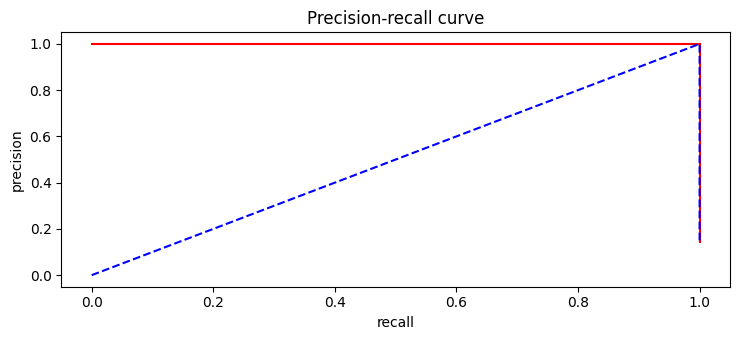

fbeta: 
0.14285714285714285
precison: 
0.14285714285714285
recall: 
0.14285714285714285
accuarcy: 
0.4
MAP: 
1.0
DOCUMENT
top news sentences
Analysts said the reported restructuring was evidence of the greater flexibility which Fiat now had to develop the business. 0.08402485465809745
The Financial Times said Fiat may transfer Maserati within its wholly- owned Alfa Romeo division in an effort to exploit commercial synergies. 0.07992656428461692
Ferrari could be listed on the stock market as part of an overhaul of Fiat's carmaking operations, the Financial Times has reported. 0.0740047426655486
The US firm agreed to pay $2bn to exit an agreement under which it could have been liable to buy Fiat outright. 0.07233294074626426
It said Fiat was set to restructure its business after reaching a $2bn (1.53bn euros; Â£1.05bn) settlement with GM about Fiat's ownership. 0.07077371681055089
Fiat owns a 56% stake in Ferrari -best known for its dominant Formula One motor racing team - having first b

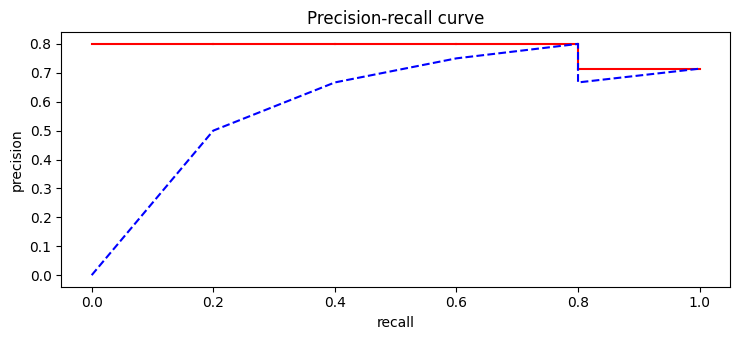

fbeta: 
0.7142857142857143
precison: 
0.7142857142857143
recall: 
0.7142857142857143
accuarcy: 
0.75
MAP: 
0.6861904761904762
DOCUMENT
top news sentences
Stock markets had factored in the likelihood of a rate rise but analysts still expressed concern about the strength of the economy. 0.0729676886676267
However, exports declined in the second half of 2004, fuelling a rise in the country's current account deficit - the difference in the value of imports compared to exports - to a record Australian dollar 29.4bn. 0.07249479097316308
"This suggests the economy really did slow very sharply in the second half of 2004." 0.06814616241708689
"That 1.5% annual growth rate is the lowest we have seen since the post-election slump we saw back in 2000-1," said Michael Blythe, chief economist at the Commonwealth Bank of Australia. 0.06448967196113398
The Bank said it had acted to curb inflation but the move was criticised by some analysts. 0.06427897313074132
The Australian government said the econo

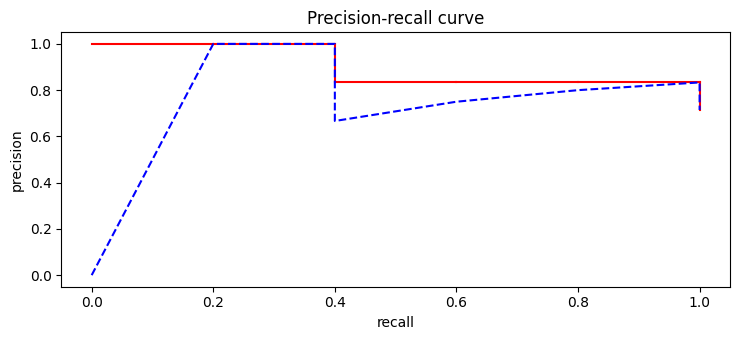

fbeta: 
0.7142857142857143
precison: 
0.7142857142857143
recall: 
0.7142857142857143
accuarcy: 
0.75
MAP: 
0.8766666666666666


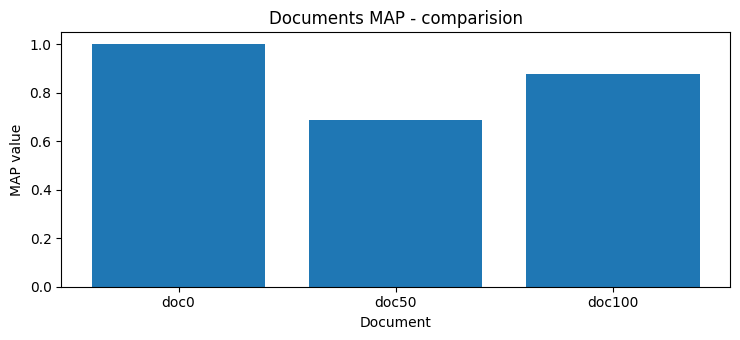

In [7]:
from mainFunctions.graph.pageRank import evaluate_page_rank
from Submission2.helper.pageRankEvaluation import draw_MAP_chart

DOCUMENTS = ['doc0', 'doc50', 'doc100']

text_processing = True
threshold = 0.2
p = 7
documents = read_files(text_processing)

doc0_ev = evaluate_page_rank(documents[0], threshold, p)
doc1_ev = evaluate_page_rank(documents[50], threshold, p)
doc2_ev = evaluate_page_rank(documents[100], threshold, p)

draw_MAP_chart(doc0_ev, doc1_ev, doc2_ev, DOCUMENTS)

<H2>Question materials (optional)</H2>

<H3>Part I: clustering</H3>

**(a)** What is the (hypothesized) number of document clusters? Are the clusters cohesive? And well
separated?

In [12]:
# #code, statistics and/or charts here
# sil_scores = []
# ran_scores = []
# pur_scores = []
# for num_clusters in range(3,11):
#     args = {'n_clusters': num_clusters, 'max_df': 0.07, 'criteria': 'mean'}
#     cluster_model = clustering(documents, args)
#     cluster_data = cluster_model.labels_
#
#     #code and charts here
#     print("\n\nMost important terms per cluster:")
#     relevant_term_list = interpret(cluster_data, documents, args)
#     for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
#         print("Cluster: " + str(index))
#         for i in range(10):
#             term = cluster_relevant_terms[i][0]
#             tfidf = cluster_relevant_terms[i][1]
#             print("Term: " + term + ", TFIDF: " + str(tfidf))
#         print("\n")
#
#     sil_score, ran_score, pur_score = evaluate(cluster_data, documents)
#     sil_scores.append(sil_score)
#     ran_scores.append(ran_score)
#     pur_scores.append(pur_score)
#
#     print("\n\nEvaluation:")
#     print("Silhouette score: " + str(sil_score))
#     print("Ran score: ", str(ran_score))
#     print("Purity score: " + str(pur_score))
#
#     pca_plot(cluster_data, documents)

In [13]:
# N = 8
#
# ind = np.arange(N)  # the x locations for the groups
# width = 0.12       # the width of the bars
#
# fig, ax = plt.subplots()
# rects1 = ax.bar(ind - width, sil_scores, width, color='#ff7f0e')
# rects2 = ax.bar(ind, ran_scores, width, color='#1f77b4')
# rects3 = ax.bar(ind + width, pur_scores, width, color='#2ca02c')
#
# # add some text for labels, title and axes ticks
# ax.set_ylabel('Scores')
# ax.set_xlabel('Number of clusters')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(('3', '4', '5', '6', '7', '8', '9', '10'))
#
# ax.legend((rects1[0], rects2[0], rects3[0]), ('Silhouette', 'Ran score', 'Purity'))
#
# plt.show()

**(b)** What the clustering reveals regarding the conceptual organization of documents?

In [14]:
#code, statistics and/or charts here

**...** (additional questions with empirical results)

<H3>Part II: Supervised approach using reference summaries</H3>

**(c)** Which features appear to be more relevant to the target summarization task?


In [15]:
check_accuracy_documents_bayes_no_idf_cosine(documents)
check_accuracy_documents_bayes_idf_cosine(documents)
check_accuracy_documents_bayes_no_idf_position(documents)
check_accuracy_documents_bayes_idf_position(documents)

Bayes idf average position: 0.4871220018183351
Bayes no idf average cosine: 0.5164856689947301
Bayes no idf average cosine: 0.5218496295624256
Bayes idf average position: 0.47917048386766253


<H3>END</H3>